In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from scipy.stats import kendalltau

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

Get fitting results - first absorber redshifts

In [3]:
z_list = [0.67, 0.72, 1.09, 1.16, 1.16, 1.27, 1.27, 1.04, 1.04, 1.04, 1.04]

In [4]:
z_markers_list = ['o', 'o', 'o', 'o', '^', 'o', '^', 'o', '^', 'v', 's']

In [5]:
z_markers_names = ['z=0.67, c1', 'z=0.72, c1', 'z=1.09, c1', 
                   'z=1.16, c1', 'z=1.16, c2', 
                   'z=1.27, c1', 'z=1.27, c2',
                   'z=1.04, c1', 'z=1.04, c2', 'z=1.04, c3', 'z=1.04, c4']

In [6]:
z_colors_list = ['salmon', 'olivedrab', 'mediumslateblue',
                'slategray', 'slategray',
                'tan', 'tan',
                'brown', 'brown', 'brown', 'brown']

Temperature and non-thermal turbulence

In [8]:
v_c_list = ['28.9, -0.7, +0.7', # z=0.67, c2
            '0.0, -0.4, +0.4', # z=0.72
            '0.0, -0.2, +0.2', # z=1.09, c1
            '0.0, -0.3, +0.3', # z=1.16, c1
            '-25, -3, +3', # z=1.16, c2
            '0.0, -0.2, +0.2', # z=1.27, c1
            '39.9, -0.2, +0.2', # z=1.27, c2
            '0.0, -0.2, +0.2', # z=1.04, c1
            '39.9, -0.3, +0.3', # z=1.04, c2
            '80.0, -0.6, +0.6', # z=1.04, c3
            '100.9, -0.4, +0.4',] # z=1.04, c4

In [9]:
logT_list = ['<4.6', # z=0.67, c2
              '4.48, -0.06, +0.06', # z=0.72
              '<4.6', # z=1.09, c1
              '4.33, -0.05, +0.05', # z=1.16, c1
              '<4.8', # z=1.16, c2
              '4.4, -0.2, +0.1', # z=1.27, c1
              '<4.9', # z=1.27, c2
              '4.26, -0.06, +0.06', # z=1.04, c1
              '<4.5', # z=1.04, c2
              '<4.5', # z=1.04, c3
              '<4.8', # z=1.04, c4
        ]

In [10]:
b_NT_list = ['31, -1, +1',
           '12, -2, +2',
           '18.3, -0.3, +0.3',
           '10.0, -0.5, +0.5',
           '26, -2, +2',
           '9.3, -0.8, +0.8',
           '<10',
           '4.9, -0.6, +0.6',
           '4.9, -0.6, +0.6',
           '10, -1, +1',
           '<9',]

Ion specific measurements

In [19]:
z_0_67 = {'HI': ['15.44, -0.06, +0.06', '34, -2, +2'],
        'CIII': ['13.97, -0.05, +0.05', '32, -2, +2'],
        'CIV': ['13.68, -0.06, +0.06', '37, -5, +6'],
        'NIII': ['<13.2', '32'],
        'OIII': ['14.42, -0.02, +0.02', '34, -2, +2'],
        'OIV': ['14.99, -0.04, +0.06', '30, -2, +2']}

In [20]:
z_0_72 = {'HI' : ['16.67, -0.02, +0.02', '25.6, -0.4, +0.4'],
        'CIII' : ['13.36, -0.07, +0.07', '16, -3, +4'],
        'CIV' : ['<12.6', '14'],
        'NIII' : ['<12.8', '14'],
        'NIV' : ['<12.4', '14'],
        'OIII' : ['13.97, -0.03, +0.03', '13, -2, +2'],
        'OIV': ['14.42, -0.02, +0.02', '30, -2, +2'],
        'OVI': ['14.17, -0.07, +0.07', '76, -14, +17']}

In [21]:
z_1_09_c1 = {'HI': ['14.3, -0.1, +0.1', '23, -3, +3'],
            'CIII': ['>13.6', '<74'],
            'CIV': ['13.96, -0.01, +0.01', '18.2, -0.3, +0.3'],
            'NIV': ['13.0, -0.1, +0.1', '13, -6, +7'],
            'OIII': ['14.28, -0.02, +0.02', '25, -2, +2'],
            'OIV': ['14.67, -0.02, +0.02', '23, -1, +1'],
            'OV': ['14.19, -0.03, +0.03', '26, -2, +2'],
            'OVI': ['13.8, -0.2, +0.2', '<89']}

In [22]:
z_1_16_c1 = {'HI' : ['16.4, -0.1, +0.1', '21.4, -0.9, +0.9'],
            'HeI' : ['14.49, -0.07, +0.07', '14, -1, +1'],
            'CIII' : ['>13.1', '<78'],
            'CIV' : ['13.49, -0.02, +0.02', '11.0, -0.4, +0.4'],
            'OIII' : ['14.16, -0.06, +0.06', '16, -2, +3'],
            'OIV' : ['14.40, -0.04, +0.04', '18, -2, +2'],
            'OV' : ['13.7, -0.1, +0.2', '10, -3, +3']}

In [23]:
z_1_16_c2 = {'HI' : ['14.6, -0.2, +0.2',  '33, -3, +3'],
            'CIII' : ['<12.8',  '27'],
            'CIV' : ['13.01, -0.06, +0.06',  '26, -2, +3'],
            'OIII' : ['<13.1',  '27'],
            'OIV' : ['13.6, -0.2, +0.2',  '28, -7, +12'],
            'OV' : ['13.82, -0.06, +0.06',  '27, -3, +3'],
            'OVI' : ['13.8, -0.1, +0.1',  '47, -13, +24']}

In [24]:
z_1_27_c1 = {'HI' : ['14.08, -0.06, +0.06', '24, -3, +3'],
            'CIII' : ['13.0, -0.2, +0.1', '20, -7, +12'],
            'CIV' : ['13.65, -0.01, +0.01', '11.1, -0.2, +0.2'],
            'NIII' : ['<12.8', '11'],
            'NIV' : ['13.0, -0.1, +0.1', '10, -5, +6'],
            'OIII' : ['13.82, -0.09, +0.09', '18, -5, +6'],
            'OIV' : ['14.43, -0.04, +0.04', '12, -1, +1'],
            'NeV' : ['14.21, -0.05, +0.05', '24, -4, +5'],
            'NeVI' : ['14.20, -0.05, +0.05', '23, -4, +5'],}

In [25]:
z_1_27_c2 = {'HI': ['13.98, -0.07, +0.07', '37, -9, +10'],
            'CIII': ['<12.4', '10'],
            'CIV': ['13.41, -0.01, +0.01', '9.8, -0.3, +0.3'],
            'NIII': ['<12.8', '9'],
            'NIV': ['<12.4', '9'],
            'OIII': ['<13.4', '9.4', '6'],
            'OIV': ['14.21, -0.05, +0.05', '11, -1, +2'],
            'NeVI': ['13.9, -0.1, +0.1', '19, -5, +6']}

In [26]:
z_1_04_c1 = {'HI' : ['14.8, -0.1, +0.1', '18, -1, +1'],
            'CIII' : ['>12.1',  '7'],
            'CIV' : ['13.64, -0.02, +0.02', '7.0, -0.3, +0.3'],
            'NIV' : ['13.1, -0.1, +0.1', '7'],
            'OIII' : ['14.35, -0.08, +0.08', '7'],
            'OIV' : ['14.50, -0.08, +0.08', '7'],
            'OV' : ['13.97, -0.02, +0.02', '23, -1, +1']}

In [27]:
z_1_04_c2 = {'HI' : ['14.1, -0.2, +0.2', '11, -2, +2'],
            'CIII' : ['>12.1',  '6.4'],
            'CIV' : ['13.38, -0.02, +0.02', '6.4, -0.4, +0.4'],
            'NIV' : ['12.9, -0.1, +0.1', '6.4'],
            'OIII' : ['13.9, -0.1, +0.1', '6.4'],
            'OIV' : ['14.21, -0.07, +0.07', '6.4'],
            'OV' : ['13.5, -0.2, +0.2', '6.4']}

In [28]:
z_1_04_c3 = {'HI' : ['14.3, -0.2, +0.1', '13, -2, +3'],
            'CIII' : ['>12.9',  '11'],
            'CIV' : ['13.45, -0.03, +0.03', '11, -1, +1'],
            'NIV' : ['13.0, -0.1, +0.1', '11'],
            'OIII' : ['13.63, -0.07, +0.07', '11'],
            'OIV' : ['14.32, -0.06, +0.06', '11'],
            'OV' : ['14.46, -0.04, +0.06', '28, -2, +2']}

In [29]:
z_1_04_c4 = {'HI' : ['14.5, -0.1, +0.1', '21, -5, +5'],
            'CIII' : ['<12.8',  '8'],
            'CIV' : ['13.52, -0.03, +0.03', '8.2, -0.6, +0.6'],
            'NIV' : ['13.0, -0.1, +0.1', '8.2'],
            'OIII' : ['13.6, -0.1, +0.1', '8.2'],
            'OIV' : ['13.9, -0.2, +0.1', '8.2'],
            'OVI' : ['14.1, -0.1, +0.1', '37.5, -9, +13']}

In [22]:
z_1_04_c5 = {'HI' : ['<15.0', '47, -16, +31', '<126'],
            'HeI' : ['<13.2', '32', '<63'],
            'CII' : ['<13.9', '26', '<36'],
            'CIV' : ['13.23, -0.07, +0.07', '26, -5, +6', '<36'],
            'NIV' : ['12.7, -0.2, +0.1', '26, -5, +6', '<34'],
            'OIV' : ['<14.4', '25, -5, +6', '<32'],
            'MgII' : ['<11.5', '24', '<26'],
            'MgX' : ['<13.6', '24', '<26'],
            'AlII' : ['<11.4', '24', '<24'],
            'AlIII' : ['<11.7', '24', '<24'],
            'SiII' : ['<12.7', '24', '<24'],
            'SIV' : ['<14.1', '23', '<22'],
            'SVI' : ['<13.3', '23', '<22'],
            'FeII' : ['<11.8', '23', '<17']}

Combine all dictionaries

In [31]:
VP_fit_list = [z_0_67, z_0_72, z_1_09_c1, 
               z_1_16_c1, z_1_16_c2, 
               z_1_27_c1, z_1_27_c2,
               z_1_04_c1, z_1_04_c2,
               z_1_04_c3, z_1_04_c4]

Write some functions to process data strings

In [32]:
def process_data_str(s, non_det_err):
    
    # Check if the point should be plotted or not
    bool_plot = False
    # Coordinate value
    coord_value = np.nan
    # Lower error
    err_lo = 0
    # Upper error
    err_hi = 0
    # Boolean for upper limit
    uplim = False
    # Boolean for lower limit
    lolim = False
    
    # If we don't have an empty string 
    if len(s)!=0:
        
        # Then it needs to be plotted
        bool_plot = True
        
        # Now, check for a non-detection first
        
        # Upper limit
        if s[0] == '<':
            # Set coordinate value
            coord_value = float(s[1:])
            # Only lower error
            uplim = True
            err_lo = non_det_err
            
        # Lower limit
        elif s[0] == '>':
            # Set coordinate value
            coord_value = float(s[1:])
            # Only upper error
            lolim = True
            err_hi = non_det_err
            
        # Detection
        else:
            s_arr = np.array(s.split(','), dtype=float)
            
            # Errors not provided
            if len(s_arr) == 1:
                coord_value = s_arr[0]
                err_lo = 0
                err_hi = 0
                
            # Errors provided
            else:
                coord_value = s_arr[0]
                err_lo = -s_arr[1] # Negative sign to flip the already present negative sign
                err_hi = s_arr[2]
        
    return bool_plot, coord_value, err_lo, err_hi, uplim, lolim

In [33]:
def plot_data_strings(ax, s_x, s_y, c, m, non_det_err_x=0.3, non_det_err_y=0.3, alpha=1):
    
    # First process each data string
    bool_plot_x, coord_value_x, err_lo_x, err_hi_x, uplim_x, lolim_x = process_data_str(s_x, non_det_err_x)
    bool_plot_y, coord_value_y, err_lo_y, err_hi_y, uplim_y, lolim_y = process_data_str(s_y, non_det_err_y)

    ax.errorbar(x=coord_value_x, y=coord_value_y,
                xerr=[[err_lo_x], [err_hi_x]],
                yerr=[[err_lo_y], [err_hi_y]], 
                color=c, alpha=alpha,
                marker=m, markersize=6.5, capsize=4, elinewidth=0.7,
                xuplims = uplim_x, xlolims= lolim_x,
                uplims = uplim_y, lolims= lolim_y) 

$b_\mathrm{NT}$ versus $\log T$

In [34]:
# Original limits are 3-sigma, convert to 1-sigma for comparison with the CUBS sample

logT_list_1sig = ['<4.5', # z=0.67
              '4.5, -0.1, +0.1', # z=0.78
              '4.5, -0.1, +0.1', # z=1.09, c1
              '<5.1', # z=1.09, c2
              '4.3, -0.1, +0.1', # z=1.16, c1
              '<4.6', # z=1.16, c2
              '4.4, -0.1, +0.1', # z=1.27, c1
              '4.5, -0.2, +0.2', # z=1.27, c2
              '4.4, -0.1, +0.1', # z=1.04, c1
              '4.2, -0.1, +0.1', # z=1.04, c2
              '<5.0', # z=1.04, c3
              '4.6, -0.1, +0.1', # z=1.04, c4
              '<5.8', # z=1.04, c5
        ]

In [35]:
b_NT_list_1sig = ['32, -1, +1',
           '12, -2, +2',
           '14.2, -0.9, +0.9',
           '<12',
           '10.0, -0.5, +0.5',
           '26, -2, +2',
           '9.5, -0.5, +0.5',
           '8, -2, +1',
           '<4',
           '<3',
           '<10',
           '<4',
           '<29']

In [36]:
CUBS_logT_list = ['4.41, -0.20, +0.13',
                '<4.6',
                '<5.2',
                '4.34, -0.26, +0.24',
                '<5.1',
                '4.72, -0.29, +0.24',
                '4.00, -0.15, +0.10',
                '<4.5',
                '4.57, -0.11, +0.11',
                '<5.1',
                '<5.0',
                '<5.4',
                '<5.2',
                '4.42, -0.23, +0.18',
                '4.03, -0.32, +0.24',
                '4.60, -0.43, +0.26',
                '<5.5',
                '4.65, -0.19, +0.09',
                '<5.4',
                '<5.1',
                '<5.0',
                '<5.4',
                '<5.3',
                '<4.9',
                '4.23, -0.27, +0.16',
                '4.49, -0.03, +0.03',
                '4.25, -0.03, +0.02',
                '<3.6',
                '<3.7',
                '3.92, -0.23, +0.16',
                '4.25, -0.05, +0.04',
                '4.18, -0.31, +0.14',
                '<5.8',
                '<3.8',
                '4.38, -0.31, +0.21',
                '4.01, -0.32, +0.18',
                '4.38, -0.13, +0.09',
                '4.19, -0.02, +0.02',
                '4.34, -0.17, +0.15',
                '3.88, -0.06, +0.06',
                '5.28, -0.16, +0.07',
                '3.93, -0.06, +0.06',
                '4.10, -0.06, +0.06',
                '4.28, -0.05, +0.04',
                '4.15, -0.09, +0.08',
                '4.31, -0.12, +0.09',
                '<5.4',
                '4.48, -0.10, +0.09',
                '4.68, -0.12, +0.11',
                '4.07, -0.04, +0.04',
                '<5.2',
                '3.91, -0.03, +0.03',
                '5.37, -0.14, +0.15',
                '<4.3',
                '<3.8',
                '<3.6',
                '4.48, -0.20, +0.14',
                '<5.0',
                '4.22, -0.22, +0.14',
                '3.62, -0.32, +0.18',
                '4.01, -0.41, +0.22',
                '4.00, -0.44, +0.24',
                '<3.5',
                '4.97, -0.10, +0.10',
                '4.93, -0.21, +0.19',
                '<4.2',
                '<3.9',
                '4.41, -0.06, +0.05',
                '<4.1',
                '4.64, -0.06, +0.06',
                '4.22, -0.22, +0.11',
                '4.68, -0.14, +0.10',
                '4.62, -0.18, +0.16',
                '3.68, -0.31, +0.17',
                '<5.3',
                '4.24, -0.03, +0.03',
                '4.15, -0.09, +0.04',
                '4.15, -0.09, +0.06',
                '<4.4',
                '4.04, -0.10, +0.08',
                '<4.6',
                '4.49, -0.38, +0.19',
                '<4.5',
                '4.81, -0.12, +0.11',
                '4.18, -0.13, +0.12',
                '4.53, -1.04, +0.35',
                '4.11, -0.40, +0.29',
                '4.43, -0.17, +0.16']

In [37]:
CUBS_b_NT_list = ['<6.9',
                '22.4, -4.8, +4.6',
                '<10.6',
                '<3.2',
                '<7.7',
                '19.8, -4.7, +5.1',
                '7.5, -0.4, +0.5',
                '34.8, -1.6, +1.2',
                '6.3, -0.7, +0.7',
                '9.8, -4.3, +2.7',
                '25.7, -3.0, +3.0',
                '<24.0',
                '<21.0',
                '6.6, -0.7, +0.5',
                '2.4, -1.4, +1.0',
                '14.4, -1.2, +1.0',
                '<19.1',
                '<4.8',
                '<14.0',
                '<13.2',
                '<12.2',
                '<25.0',
                '<12.4',
                '<7.8',
                '26.6, -2.0, +2.0',
                '7.3, -0.9, +0.8',
                '10.5, -0.4, +0.3',
                '8.9, -3.0, +2.8',
                '19.2, -1.7, +2.3',
                '19.1, -1.6, +1.3',
                '7.5, -1.3, +1.3',
                '11.2, -6.1, +4.7',
                '22.2, -9.0, +3.6',
                '12.9, -0.8, +0.8',
                '21.2, -2.4, +2.3',
                '8.8, -1.8, +1.7',
                '17.8, -2.6, +2.6',
                '9.8, -0.4, +0.4',
                '4.1, -0.9, +0.7',
                '5.2, -0.2, +0.2',
                '<26.3',
                '3.6, -0.3, +0.3',
                '4.9, -0.2, +0.2',
                '<2.2',
                '5.5, -0.4, +0.4',
                '9.9, -2.5, +2.5',
                '29.5, -5.3, +1.9',
                '<3.8',
                '19.1, -1.5, +1.4',
                '3.7, -1.3, +1.1',
                '20.7, -4.3, +2.6',
                '5.6, -0.5, +0.5',
                '12.7, -6.2, +6.9',
                '18.2, -1.7, +1.7',
                '10.6, -0.6, +0.7',
                '10.8, -0.9, +1.0',
                '16.5, -4.1, +4.0',
                '63.7, -8.3, +5.6',
                '13.7, -2.9, +2.9',
                '7.8, -1.7, +1.8',
                '15.6, -3.6, +2.9',
                '20.2, -2.2, +2.2',
                '11.8, -1.8, +2.1',
                '<14.2',
                '<10.4',
                '25.8, -2.4, +5.1',
                '12.9, -0.9, +1.4',
                '13.2, -0.5, +0.4',
                '14.4, -1.6, +4.1',
                '<4.2',
                '7.8, -4.8, +5.3',
                '17.6, -4.6, +4.2',
                '18.5, -1.9, +2.0',
                '9.2, -1.7, +1.7',
                '<50.0',
                '4.2, -1.3, +1.1',
                '<8.0',
                '4.7, -3.0, +3.4',
                '23.4, -4.5, +1.2',
                '5.9, -0.8, +0.8',
                '20.8, -2.5, +2.5',
                '15.2, -8.6, +8.1',
                '16.3, -5.0, +5.0',
                '5.5, -2.8, +2.2',
                '2.1, -1.3, +1.1',
                '9.5, -3.7, +5.0',
                '6.4, -2.0, +1.8',
                '5.6, -1.4, +1.1']

In [38]:
def b_NT_logT_plot(ax, logT_list, b_NT_list, z_list):
    
    for i in range(len(b_NT_list)):
        
        logT_str = logT_list[i]
        b_NT_str = b_NT_list[i]
        z = z_list[i]
        c = 'black'
        m = 'o'

        plot_data_strings(ax, logT_str, b_NT_str, c, m, 0.25, 5)

In [39]:
def b_NT_logT_CUBS_plot(ax, logT_list, b_NT_list, c='gray', alpha=.1):
    
    for i in range(len(b_NT_list)):
                
        logT_str = logT_list[i]
        b_NT_str = b_NT_list[i]

        plot_data_strings(ax, logT_str, b_NT_str, c, 'o', alpha=alpha)

In [40]:
def b_ion_pair_plot(ax, ion_1, ion_2, VP_fit_list, z_list):
    
    for i in range(len(z_list)):
        
        z = z_list[i]
        VP_fit_dict = VP_fit_list[i]
        
        if ion_1 in list(VP_fit_dict.keys()) and ion_2 in list(VP_fit_dict.keys()):
            
            ion_1_str_list = VP_fit_dict[ion_1]
            ion_2_str_list = VP_fit_dict[ion_2]

            b_1_str = ion_1_str_list[1]
            b_2_str = ion_2_str_list[1]

            c = 'black'
            m = 'o'

            plot_data_strings(ax, b_1_str, b_2_str, c, m, 5, 5)

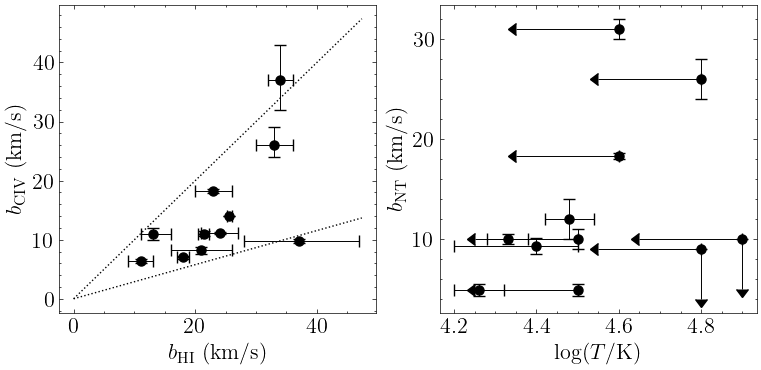

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

b_NT_logT_plot(axes[1], logT_list, b_NT_list, z_list)
#b_NT_logT_CUBS_plot(ax, CUBS_logT_list, CUBS_b_NT_list)

axes[1].set_xlabel(r'$\log (T/\mathrm{K})$')
axes[1].set_ylabel(r'$b_{\mathrm{NT}}$ (km/s)')

b_ion_pair_plot(axes[0], 'HI', 'CIV', VP_fit_list, z_list)

x = np.arange(0, 47.5, 0.1)
y_NT = x
y_T = x/np.sqrt(12)

axes[0].plot(x, y_T, linestyle=':', color='black')
axes[0].plot(x, y_NT, linestyle=':', color='black')

axes[0].set_xlabel(r'$b_\mathrm{HI}$ (km/s)')
axes[0].set_ylabel(r'$b_\mathrm{CIV}$ (km/s)')

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/b_NT_vs_logT.pdf', dpi=300)

$\log N$ versus $\log N$

In [51]:
def calc_ken_tau(X_list, Y_list, N_trials=1000):
    
    # For each trial, draw samples of all data points
    X_samples = np.zeros((N_trials, len(X_list)))
    Y_samples = np.zeros((N_trials, len(X_list)))
    
    for i in range(len(X_list)):
        
        s_x = X_list[i]
        s_y = Y_list[i]
    
        # First process each data string
        bool_plot_x, coord_value_x, err_lo_x, err_hi_x, uplim_x, lolim_x = process_data_str(s_x, 0.3)
        bool_plot_y, coord_value_y, err_lo_y, err_hi_y, uplim_y, lolim_y = process_data_str(s_y, 0.3)
        
        # Assuming detection, set the centroid of the normal distribution
        mu_x = coord_value_x
        sig_x = max(err_lo_x, err_hi_x)
        
        # In case of non-detections, switch the distribution accordingly
        if uplim_x == True:
            sig_x = 0.14 # 1/3*ln(10)
            mu_x -= 3*sig_x
            
        elif lolim_x == True:
            sig_x = 0.14
            mu_x += 3*sig_x
        
        # Assuming detection, set the centroid of the normal distribution
        mu_y = coord_value_y
        sig_y = max(err_lo_y, err_hi_y)
        
        # In case of non-detections, switch the distribution accordingly
        if uplim_y == True:
            sig_y = 0.14 # 1/3*ln(10)
            mu_y -= 3*sig_y
            
        elif lolim_y == True:
            sig_y = 0.14
            mu_y += 3*sig_y
        
        # Draw samples
        X_samples[:, i] = np.random.normal(loc=mu_x, scale=sig_x, size=N_trials)
        Y_samples[:, i] = np.random.normal(loc=mu_y, scale=sig_y, size=N_trials)
        
    ken_tau_samples = np.zeros(N_trials)
    
    for j in range(len(ken_tau_samples)):
        
        X_draw = X_samples[j, :]
        Y_draw = Y_samples[j, :]
                
        ken_tau_samples[j] = kendalltau(x=X_draw, y=Y_draw)[0]
        
    return ken_tau_samples

In [66]:
def logN_ion_pair_plot(ax, ion_1, ion_2, VP_fit_list, z_list, c, non_det_err_x, non_det_err_y, N_trials):
    
    logN_1_list = []
    logN_2_list = []
    
    for i in range(len(z_list)):
        
        z = z_list[i]
        VP_fit_dict = VP_fit_list[i]
        
        if ion_1 in list(VP_fit_dict.keys()) and ion_2 in list(VP_fit_dict.keys()):
            
            ion_1_str_list = VP_fit_dict[ion_1]
            ion_2_str_list = VP_fit_dict[ion_2]

            logN_1_str = ion_1_str_list[0]
            logN_2_str = ion_2_str_list[0]

            plot_data_strings(ax, logN_1_str, logN_2_str, c, 'o', 
                              non_det_err_x=non_det_err_x, non_det_err_y=non_det_err_y)
            
            logN_1_list.append(logN_1_str)
            logN_2_list.append(logN_2_str)
            
    #return calc_ken_tau(logN_1_list, logN_2_list, N_trials)

In [72]:
N_trials = 5000

In [172]:
ion_list_C = ['CIII', 'CIV']
colors_C = ['black', 'peru']

handles_C = []

for i in range(len(ion_list_C)):
    
    handles_C.append(mlines.Line2D([], [], color=colors_C[i], marker='o',
                  linestyle='None', markersize=7, label=ion_list_C[i]))
    
#ken_tau_ions_lo = np.zeros((len(ion_list_lo), N_trials))

In [173]:
ion_list_N = ['NIII', 'NIV']
colors_N = ['darkolivegreen', 'dodgerblue']

handles_N = []

for i in range(len(ion_list_N)):
    
    handles_N.append(mlines.Line2D([], [], color=colors_N[i], marker='o',
                  linestyle='None', markersize=7, label=ion_list_N[i]))
    
#ken_tau_ions_med = np.zeros((len(ion_list_med), N_trials))

In [174]:
ion_list_O = ['OIII', 'OIV', 'OV', 'OVI']
colors_O = ['lightseagreen', 'firebrick', 'midnightblue', 'violet']

handles_O = []

for i in range(len(ion_list_O)):
    
    handles_O.append(mlines.Line2D([], [], color=colors_O[i], marker='o',
                  linestyle='None', markersize=7, label=ion_list_O[i]))
    
#ken_tau_ions_hi = np.zeros((len(ion_list_hi), N_trials))

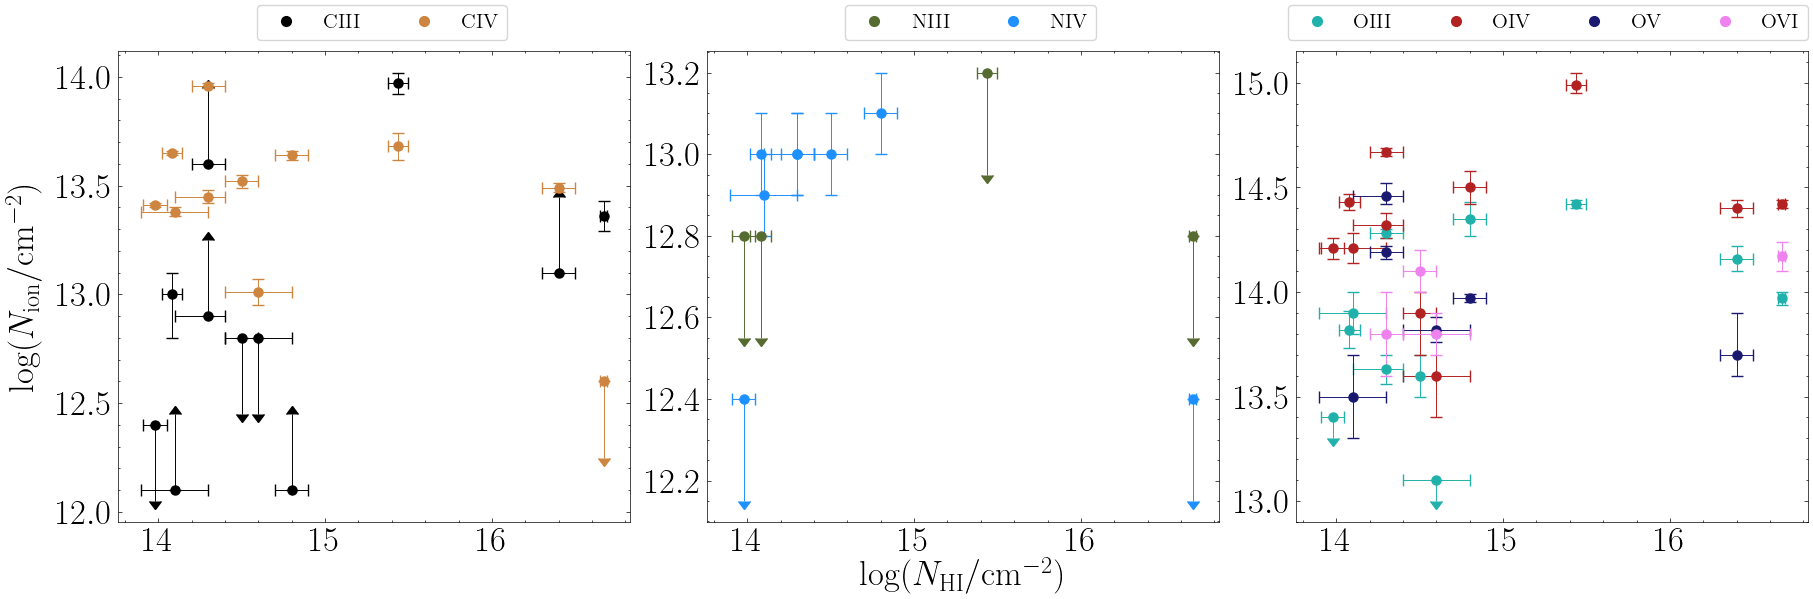

In [182]:
fig, axes = plt.subplots(1, 3, figsize=(6*3,6), sharex=True)

plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)

for i in range(len(ion_list_C)):   
    logN_ion_pair_plot(axes[0], 'HI', ion_list_C[i], VP_fit_list, z_list, 
                       colors_C[i], 0.3, 0.35, N_trials)

axes[0].legend(handles=handles_C, ncol=2, bbox_to_anchor=(0.78, 1.12), fontsize=15)
#axes[0].set_xticks([14.0, 15.0, 16.0], labelsize=25)
#axes[0].text(x=13.3, y=15, s=r'$\tau \lesssim$'+' {}'.format(0.2), fontsize=17)


for i in range(len(ion_list_N)):   
    logN_ion_pair_plot(axes[1], 'HI', ion_list_N[i], VP_fit_list, z_list, 
                       colors_N[i], 0.3, 0.25, N_trials)
    
axes[1].legend(handles=handles_N, ncol=3, bbox_to_anchor=(0.78, 1.12), fontsize=15)
#axes[1].text(x=13.3, y=14.7, s=r'$\tau \lesssim$'+' {}'.format(0.4), fontsize=17)


for i in range(len(ion_list_O)):   
    logN_ion_pair_plot(axes[2], 'HI', ion_list_O[i], VP_fit_list, z_list, 
                       colors_O[i], 0.3, 0.1, N_trials)

axes[2].legend(handles=handles_O, ncol=4, bbox_to_anchor=(1.02, 1.12), fontsize=15)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.2)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log (N_{\mathrm{HI}}/\mathrm{cm}^{-2})$', labelpad=25, fontsize=25)
ax_label.set_ylabel(r'$\log (N_{\mathrm{ion}}/\mathrm{cm}^{-2})$', labelpad=55, fontsize=25) # Use argument `labelpad` to move label downwards.

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/logN_vs_logN.pdf', dpi=300)

In [79]:
#for i in range(len(ion_list_lo)):
#    plt.hist(ken_tau_ions_lo[i], color=colors_lo[i], alpha=.5)

In [80]:
#for i in range(len(ion_list_med)):
#    plt.hist(ken_tau_ions_med[i], color=colors_med[i], alpha=.5)

In [81]:
#for i in range(len(ion_list_hi)):
#    plt.hist(ken_tau_ions_hi[i], color=colors_hi[i], alpha=.5)

In [82]:
#{ion_list_lo[i]: np.round(np.median(ken_tau_ions_lo[i,:]), 1) for i in range(len(ion_list_lo))}

In [83]:
#{ion_list_med[i]: np.round(np.median(ken_tau_ions_med[i,:]), 1) for i in range(len(ion_list_med))}

In [84]:
#{ion_list_hi[i]: np.round(np.median(ken_tau_ions_hi[i,:]), 1) for i in range(len(ion_list_hi))}

$\log N$ versus $b$

In [47]:
def logN_b_plot(ax, ion, VP_fit_list, z_list, z_color_dict):
    
    for i in range(len(z_list)):
        
        z = z_list[i]
        VP_fit_dict = VP_fit_list[i]
        
        if ion in list(VP_fit_dict.keys()):
            ion_str_list = VP_fit_dict[ion]

            logN_str = ion_str_list[0]
            b_str = ion_str_list[1]

            c = z_colors_list[i]
            m = z_markers_list[i]

            plot_data_strings(ax, logN_str, b_str, c, m)

In [48]:
plot_ions = ['HI', 'CIII', 'CIV', 'NIV', 'OIII', 'OIV']

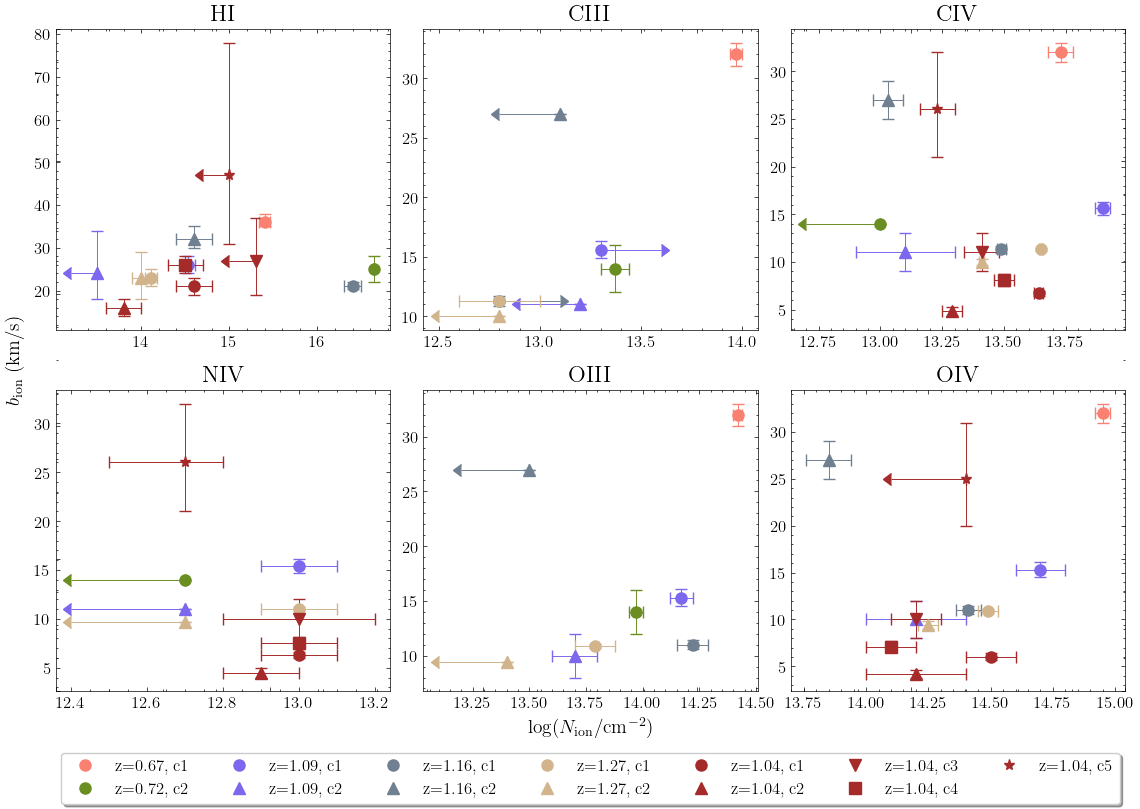

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))

for i in range(len(plot_ions)):
    
    ion = plot_ions[i]
    ax = axes[i//3, i%3]
    logN_b_plot(ax, ion, VP_fit_list, z_list, z_colors_list)
    ax.set_title(ion)
    
ax_label = fig.add_subplot(111, frameon=False)
## hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

ax_label.set_xlabel(r'$\log (N_{\mathrm{ion}}/\mathrm{cm}^{-2})$')
ax_label.set_ylabel(r'$b_{\mathrm{ion}}$ (km/s)') # Use argument `labelpad` to move label downwards.

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# Specify handles ONLY for this plot

handles = []

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=z_colors_list[i], marker=z_markers_list[i],
                  linestyle='None', markersize=8, label=z_markers_names[i]))
    
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=7)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/b_vs_logN.pdf', dpi=300)
        
#ax.set_xlabel(r'$b_{\mathrm{NT}}$ (km/s)')
#ax.set_ylabel(r'$\log (N_{\mathrm{HI}}/\mathrm{cm}^{-2})$')

$\log N$ versus $b_{\mathrm{T}}$

In [50]:
def logN_b_T_plot(ax, ion, VP_fit_list, z_list, z_color_dict):
    
    for i in range(len(z_list)):
        
        z = z_list[i]
        VP_fit_dict = VP_fit_list[i]
        
        if ion in list(VP_fit_dict.keys()):
            ion_str_list = VP_fit_dict[ion]

            logN_str = ion_str_list[0]
            b_T_str = ion_str_list[2]

            c = z_colors_list[i]
            m = z_markers_list[i]

            plot_data_strings(ax, logN_str, b_T_str, c, m)

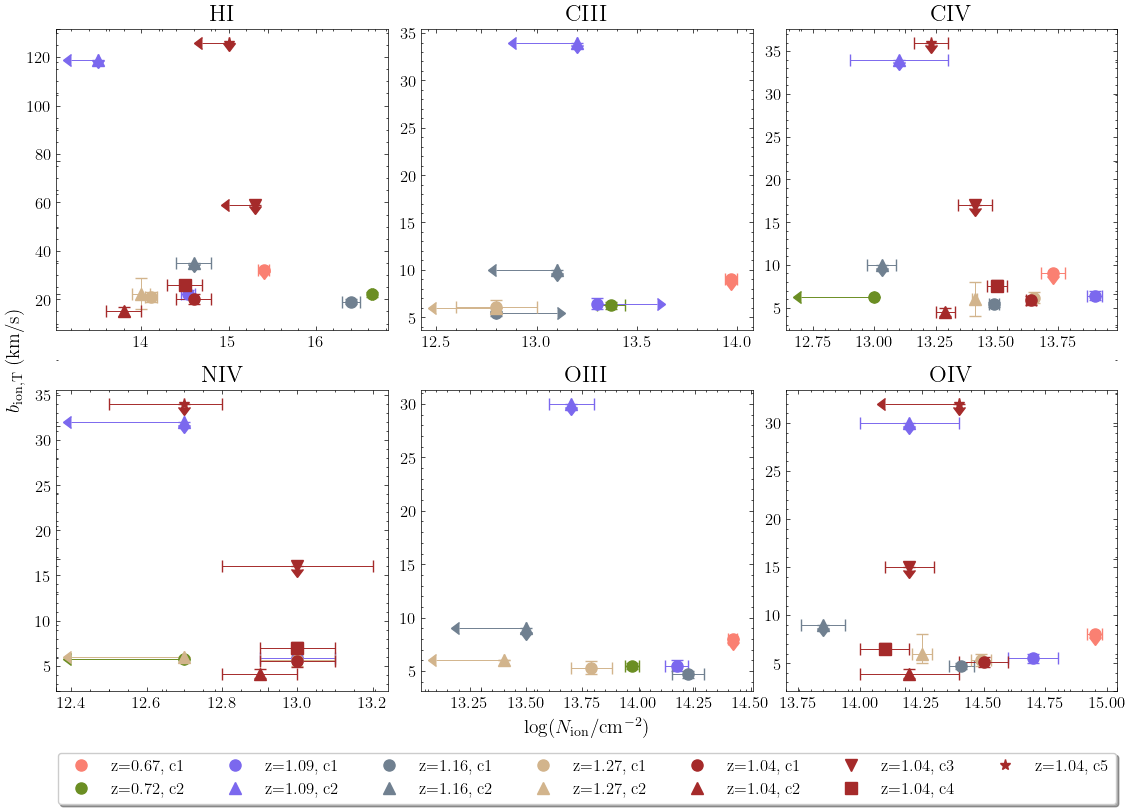

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))

for i in range(len(plot_ions)):
    
    ion = plot_ions[i]
    ax = axes[i//3, i%3]
    logN_b_T_plot(ax, ion, VP_fit_list, z_list, z_colors_list)
    ax.set_title(ion)
    
ax_label = fig.add_subplot(111, frameon=False)
## hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

ax_label.set_xlabel(r'$\log (N_{\mathrm{ion}}/\mathrm{cm}^{-2})$')
ax_label.set_ylabel(r'$b_{\mathrm{ion, T}}$ (km/s)') # Use argument `labelpad` to move label downwards.

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# Specify handles ONLY for this plot

handles = []

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=z_colors_list[i], marker=z_markers_list[i],
                  linestyle='None', markersize=8, label=z_markers_names[i]))
    
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=7)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/b_T_vs_logN.pdf', dpi=300)
        
#ax.set_xlabel(r'$b_{\mathrm{NT}}$ (km/s)')
#ax.set_ylabel(r'$\log (N_{\mathrm{HI}}/\mathrm{cm}^{-2})$')

$\log N$ versus $b_{\mathrm{NT}}$

In [57]:
def logN_b_NT_plot(ax, ion, VP_fit_list, b_NT_list, z_list, z_color_dict):
    
    for i in range(len(z_list)):
        
        z = z_list[i]
        VP_fit_dict = VP_fit_list[i]
        
        if ion in list(VP_fit_dict.keys()):
            ion_str_list = VP_fit_dict[ion]

            logN_str = ion_str_list[0]
            b_NT_str = b_NT_list[i]

            c = z_colors_list[i]
            m = z_markers_list[i]

            plot_data_strings(ax, logN_str, b_NT_str, c, m)

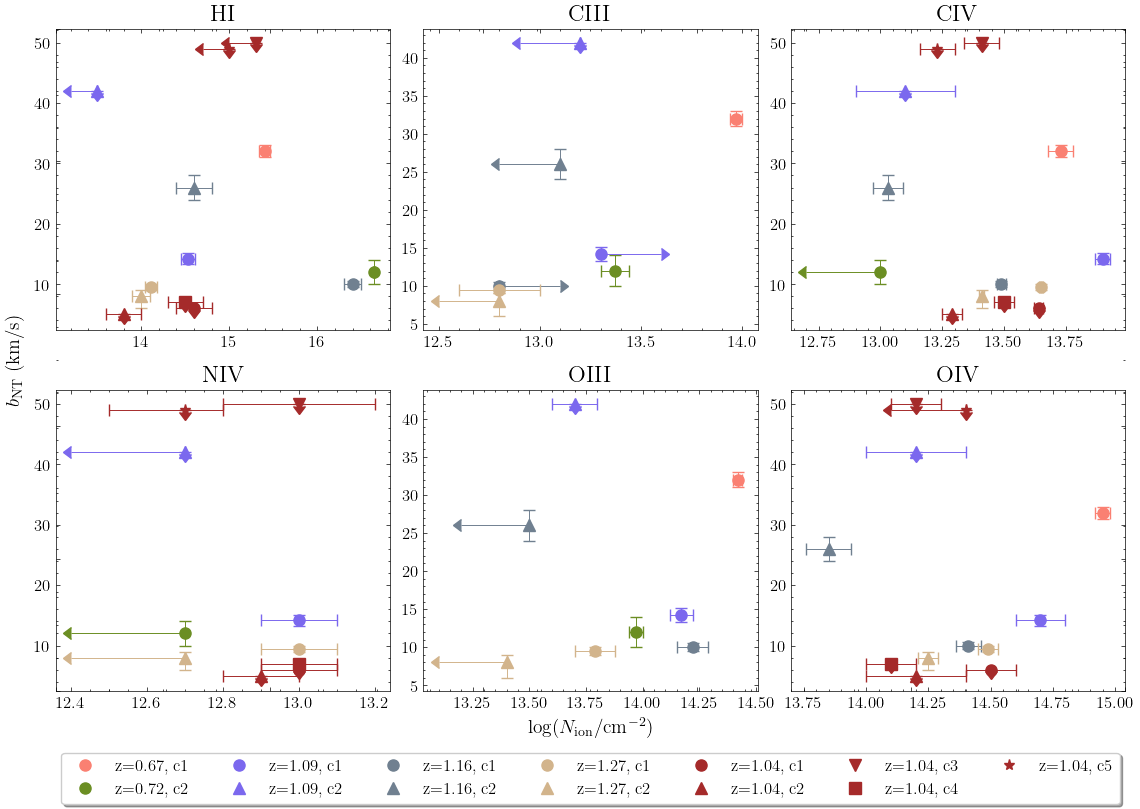

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))

for i in range(len(plot_ions)):
    
    ion = plot_ions[i]
    ax = axes[i//3, i%3]
    logN_b_NT_plot(ax, ion, VP_fit_list, b_NT_list, z_list, z_colors_list)
    ax.set_title(ion)
    
ax_label = fig.add_subplot(111, frameon=False)
## hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

ax_label.set_xlabel(r'$\log (N_{\mathrm{ion}}/\mathrm{cm}^{-2})$')
ax_label.set_ylabel(r'$b_{\mathrm{NT}}$ (km/s)') # Use argument `labelpad` to move label downwards.

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# Specify handles ONLY for this plot

handles = []

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=z_colors_list[i], marker=z_markers_list[i],
                  linestyle='None', markersize=8, label=z_markers_names[i]))
    
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=7)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/b_NT_vs_logN.pdf', dpi=300)
        
#ax.set_xlabel(r'$b_{\mathrm{NT}}$ (km/s)')
#ax.set_ylabel(r'$\log (N_{\mathrm{HI}}/\mathrm{cm}^{-2})$')

$\log T$ versus $\log N$

In [59]:
def logN_logT_plot(ax, ion, VP_fit_list, logT_list, z_list, z_color_dict):
    
    for i in range(len(z_list)):
        
        z = z_list[i]
        VP_fit_dict = VP_fit_list[i]
        
        if ion in list(VP_fit_dict.keys()):
            ion_str_list = VP_fit_dict[ion]

            logN_str = ion_str_list[0]
            logT_str = logT_list[i]

            c = z_colors_list[i]
            m = z_markers_list[i]

            plot_data_strings(ax, logN_str, logT_str, c, m)

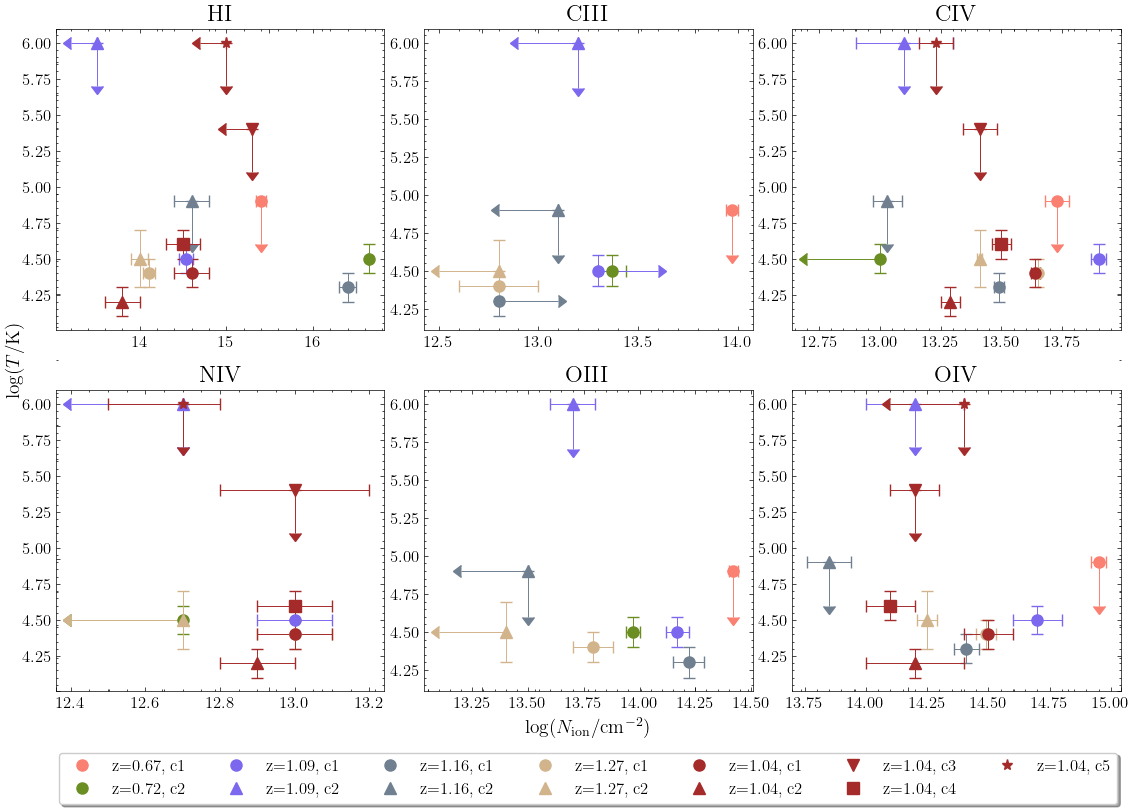

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))

for i in range(len(plot_ions)):
    
    ion = plot_ions[i]
    ax = axes[i//3, i%3]
    logN_logT_plot(ax, ion, VP_fit_list, logT_list, z_list, z_colors_list)
    ax.set_title(ion)
    
ax_label = fig.add_subplot(111, frameon=False)
## hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

ax_label.set_xlabel(r'$\log (N_{\mathrm{ion}}/\mathrm{cm}^{-2})$')
ax_label.set_ylabel(r'$\log (T/\mathrm{K})$') # Use argument `labelpad` to move label downwards.

plt.tight_layout()
plt.subplots_adjust(wspace=0.12, hspace=0.2)

# Specify handles ONLY for this plot

handles = []

for i in range(len(z_list)):
    
    handles.append(mlines.Line2D([], [], color=z_colors_list[i], marker=z_markers_list[i],
                  linestyle='None', markersize=8, label=z_markers_names[i]))
    
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=7)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/logT_vs_logN.pdf', dpi=300)
        
#ax.set_xlabel(r'$b_{\mathrm{NT}}$ (km/s)')
#ax.set_ylabel(r'$\log (N_{\mathrm{HI}}/\mathrm{cm}^{-2})$')

Generate column density ratios

In [95]:
def gen_logN_ratio_str(logN_str_1, logN_str_2, non_det_err=0.3):
    
    # First process each data string
    bool_plot_logN1, coord_value_logN1, err_lo_logN1, err_hi_logN1, uplim_logN1, lolim_logN1 = process_data_str(logN_str_1, non_det_err)
    bool_plot_logN2, coord_value_logN2, err_lo_logN2, err_hi_logN2, uplim_logN2, lolim_logN2 = process_data_str(logN_str_2, non_det_err)
    
    # Classify detection
    det_logN1 = bool_plot_logN1 and (not uplim_logN1) and (not lolim_logN1)
    det_logN2 = bool_plot_logN2 and (not uplim_logN2) and (not lolim_logN2)
    
    # Relevant quantities
    logN_ratio = coord_value_logN1-coord_value_logN2
    err_lo_logN_ratio = -np.sqrt(err_lo_logN1**2 + err_lo_logN2**2) # Put negative sign for consistency w/ plotting functions
    err_hi_logN_ratio = np.sqrt(err_hi_logN1**2 + err_hi_logN2**2)  
    
    # Classify cases as booleans
        
    # Variables to store 
    logN_ratio_str = ''
    
    # Cases that create upper limits
    
    # N1 upper limit and N2 lower limit
    # N1 upper limit and N2 detection
    # N1 detection and N2 lower limit - WHAT is the probabilistic meaning of this?
    if (uplim_logN1 == True and lolim_logN2 == True) or (uplim_logN1 == True and det_logN2 == True) or (det_logN1 == True and lolim_logN2 == True):
        logN_ratio_str = '<{:.2f}'.format(logN_ratio)
    
    # Cases that create lower limits
    
    # N1 lower limit and N2 upper limit
    # N1 lower limit and N2 detection
    # N1 detection and N2 upper limit - WHAT is the probabilistic meaning of this?
    elif (lolim_logN1 == True and uplim_logN2 == True) or (lolim_logN1 == True and det_logN2 == True) or (det_logN1 == True and uplim_logN2 == True):
        logN_ratio_str = '>{:.2f}'.format(logN_ratio)  
        
    # Both are detections
    elif det_logN1 == True and det_logN2 == True:
        logN_ratio_str = '{:.2f}, {:.2f}, {:.2f}'.format(logN_ratio,
                                            err_lo_logN_ratio, # Errors add in quadrature
                                            err_hi_logN_ratio)
        
    return logN_ratio_str

In [96]:
logN_ratio_dict = {'CIV_CIII': [], 
                   'OIV_OIII': [],
                   'CIV_OIV': [],
                   'CIII_OIII': [],
                   'CIV_NIV': []}

In [97]:
for i in range(len(z_list)):
    
    VP_fit_dict = VP_fit_list[i]
    
    logN_CIV_str = '' 
    logN_CIII_str = ''
    logN_OIV_str = '' 
    logN_OIII_str = ''
    logN_NIV_str = ''
    
    if 'CIV' in list(VP_fit_dict.keys()):
        logN_CIV_str = VP_fit_dict['CIV'][0]
        
    if 'CIII' in list(VP_fit_dict.keys()):
        logN_CIII_str = VP_fit_dict['CIII'][0]        
        
    if 'OIV' in list(VP_fit_dict.keys()):
        logN_OIV_str = VP_fit_dict['OIV'][0]
        
    if 'OIII' in list(VP_fit_dict.keys()):
        logN_OIII_str = VP_fit_dict['OIII'][0]

    if 'NIV' in list(VP_fit_dict.keys()):
        logN_NIV_str = VP_fit_dict['NIV'][0]
                                        
    logN_ratio_dict['CIV_CIII'].append(gen_logN_ratio_str(logN_CIV_str, logN_CIII_str))
    logN_ratio_dict['OIV_OIII'].append(gen_logN_ratio_str(logN_OIV_str, logN_OIII_str))
    logN_ratio_dict['CIV_OIV'].append(gen_logN_ratio_str(logN_CIV_str, logN_OIV_str))
    logN_ratio_dict['CIII_OIII'].append(gen_logN_ratio_str(logN_CIII_str, logN_OIII_str))
    logN_ratio_dict['CIV_NIV'].append(gen_logN_ratio_str(logN_CIV_str, logN_NIV_str))

Plot column density ratios versus temperature

In [99]:
def logN_ratio_logT_plot(ax, ion_pair, logN_ratio_dict, logT_list, z_list, z_colors_list):
    
    for i in range(len(logT_list)):
        
        logN_ratio_str = logN_ratio_dict[ion_pair][i]
        logT_str = logT_list[i]
        z = z_list[i]
        c = z_colors_list[i]
        m = z_markers_list[i]

        plot_data_strings(ax, logN_ratio_str, logT_str, c, m)

In [100]:
ion_pair_labels = {'CIV_CIII': r'$\log (N_{\mathrm{CIV}}/ N_{\mathrm{CIII}})$',
                   'OIV_OIII': r'$\log (N_{\mathrm{OIV}}/ N_{\mathrm{OIII}})$',
                   'CIV_OIV': r'$\log (N_{\mathrm{CIV}}/ N_{\mathrm{OIV}})$',
                   'CIII_OIII': r'$\log (N_{\mathrm{CIII}}/ N_{\mathrm{OIII}})$',
                   'CIV_NIV': r'$\log (N_{\mathrm{CIV}}/ N_{\mathrm{NIV}})$',}

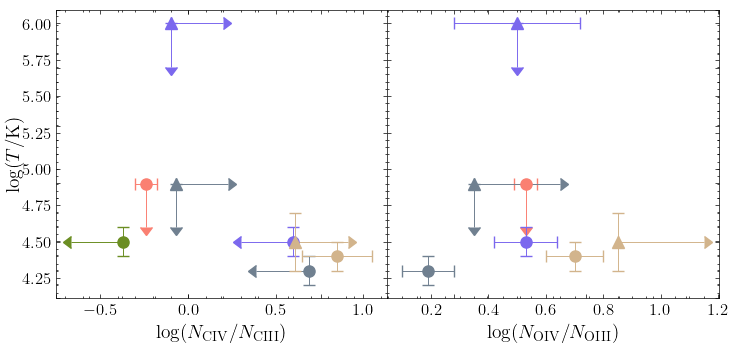

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)

plot_ion_pairs = ['CIV_CIII', 'OIV_OIII']
    
for i in range(len(plot_ion_pairs)):
    
    ion_pair = plot_ion_pairs[i]
    ax = axes[i]
    logN_ratio_logT_plot(ax, ion_pair, logN_ratio_dict, logT_list, z_list, z_colors_list)
    ax.set_xlabel(ion_pair_labels[ion_pair])
    
ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

ax_label.set_ylabel(r'$\log (T/\mathrm{K})$') # Use argument `labelpad` to move label downwards.
    
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/logT_vs_logN_ratio.pdf', dpi=300)

Plot column density ratios versus $b_{\mathrm{NT}}$

In [102]:
def logN_ratio_b_NT_plot(ax, ion_pair, logN_ratio_dict, b_NT_list, z_list, z_colors_list):
    
    for i in range(len(logT_list)):
        
        logN_ratio_str = logN_ratio_dict[ion_pair][i]
        b_NT_str = b_NT_list[i]
        z = z_list[i]
        c = z_colors_list[i]
        m = z_markers_list[i]

        plot_data_strings(ax, logN_ratio_str, b_NT_str, c, m)

In [103]:
ion_pair_labels = {'CIV_CIII': r'$\log (N_{\mathrm{CIV}}/ N_{\mathrm{CIII}})$',
                   'OIV_OIII': r'$\log (N_{\mathrm{OIV}}/ N_{\mathrm{OIII}})$',
                   'CIV_OIV': r'$\log (N_{\mathrm{CIV}}/ N_{\mathrm{OIV}})$',
                   'CIII_OIII': r'$\log (N_{\mathrm{CIII}}/ N_{\mathrm{OIII}})$',
                   'CIV_NIV': r'$\log (N_{\mathrm{CIV}}/ N_{\mathrm{NIV}})$',}

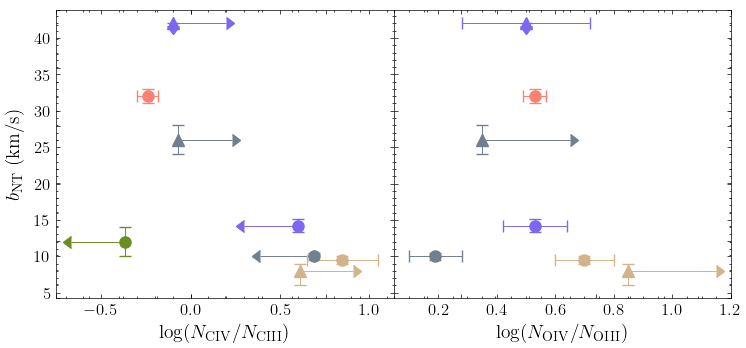

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)

plot_ion_pairs = ['CIV_CIII', 'OIV_OIII']
    
for i in range(len(plot_ion_pairs)):
    
    ion_pair = plot_ion_pairs[i]
    ax = axes[i]
    logN_ratio_b_NT_plot(ax, ion_pair, logN_ratio_dict, b_NT_list, z_list, z_colors_list)
    ax.set_xlabel(ion_pair_labels[ion_pair])
    
ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

ax_label.set_ylabel(r'$b_{\mathrm{NT}}$ (km/s)') # Use argument `labelpad` to move label downwards.
    
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/b_NT_vs_logN_ratio.pdf', dpi=300)

Plot column density ratios versus $\log N_{\mathrm{HI}}$

In [112]:
logN_HI_list = [VP_fit_list[i]['HI'][0] for i in range(len(z_list))]

In [113]:
def logN_ratio_logN_plot(ax, ion_pair, logN_ratio_dict, logN_list, z_list, z_colors_list):
    
    for i in range(len(logN_list)):
        
        logN_ratio_str = logN_ratio_dict[ion_pair][i]
        logN_str = logN_list[i]
        z = z_list[i]
        c = z_colors_list[i]
        m = z_markers_list[i]

        plot_data_strings(ax, logN_ratio_str, logN_str, c, m)

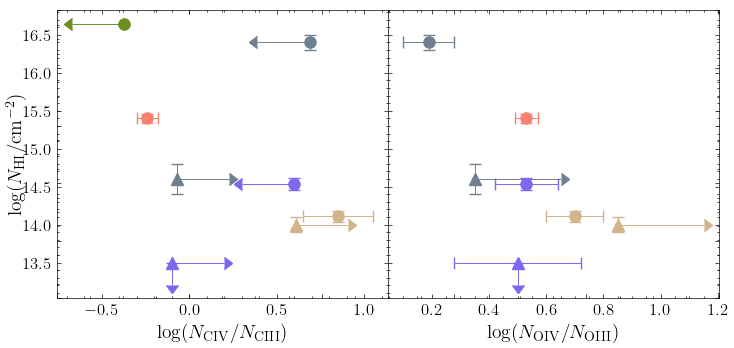

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)

plot_ion_pairs = ['CIV_CIII', 'OIV_OIII']
    
for i in range(len(plot_ion_pairs)):
    
    ion_pair = plot_ion_pairs[i]
    ax = axes[i]
    logN_ratio_logN_plot(ax, ion_pair, logN_ratio_dict, logN_HI_list, z_list, z_colors_list)
    ax.set_xlabel(ion_pair_labels[ion_pair])

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

ax_label.set_ylabel(r'$\log (N_{\mathrm{HI}}/\mathrm{cm}^{-2})$') # Use argument `labelpad` to move label downwards.
    
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/logN_HI_vs_logN_ratio.pdf', dpi=300)

Plot column density ratios across different elements

In [117]:
def logN_logN_ratio_plot(ax, ion_pair, logN_list, logN_ratio_dict, z_list, z_colors_list):
    
    for i in range(len(logN_list)):
        
        logN_str = logN_list[i]
        logN_ratio_str = logN_ratio_dict[ion_pair][i]
        z = z_list[i]
        c = z_colors_list[z]
        m = z_markers_list[i]

        plot_data_strings(ax, logN_str, logN_ratio_str, c, m)

In [118]:
ion_labels = {'OIII': r'$\log (N_{\mathrm{OIII}}/\mathrm{cm}^{-2})$',
             'OIV': r'$\log (N_{\mathrm{OIV}}/\mathrm{cm}^{-2})$',}

In [119]:
n_C_H_solar = 0.000245
n_O_H_solar = 0.00049
n_N_H_solar = 8.51e-05

f_CIII = 0.0382

C_O_solar = np.log10(n_C_H_solar/n_O_H_solar)

NameError: name 'logN_dict' is not defined

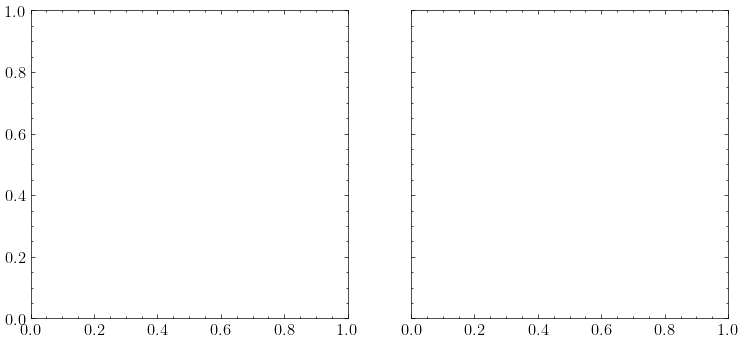

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(9,4), sharey=True)

plot_ion_pairs = ['CIII_OIII', 'CIV_OIV']
plot_ions = ['OIII', 'OIV']
    
for i in range(len(plot_ion_pairs)):
    
    ion_pair = plot_ion_pairs[i]
    ion = plot_ions[i]
    ax = axes[i]
    #ax.axhline(C_O_solar, linestyle=':', color='black')
    logN_logN_ratio_plot(ax, ion_pair, logN_dict[ion], logN_ratio_dict, z_list, z_color_dict)
    ax.set_ylabel(ion_pair_labels[ion_pair])
    ax.set_xlabel(ion_labels[ion])
    #ax.set_xlim(0, 20)
    #ax.set_ylim(12, 14.5)